Load Preprocessed Dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = "gym_footfall_preprocessed.csv"
df = pd.read_csv(DATA_PATH)

print("Dataset loaded for EDA.")
print("Shape:", df.shape)

Dataset loaded for EDA.
Shape: (1827, 26)


Time-Series Overview of Gym Footfall

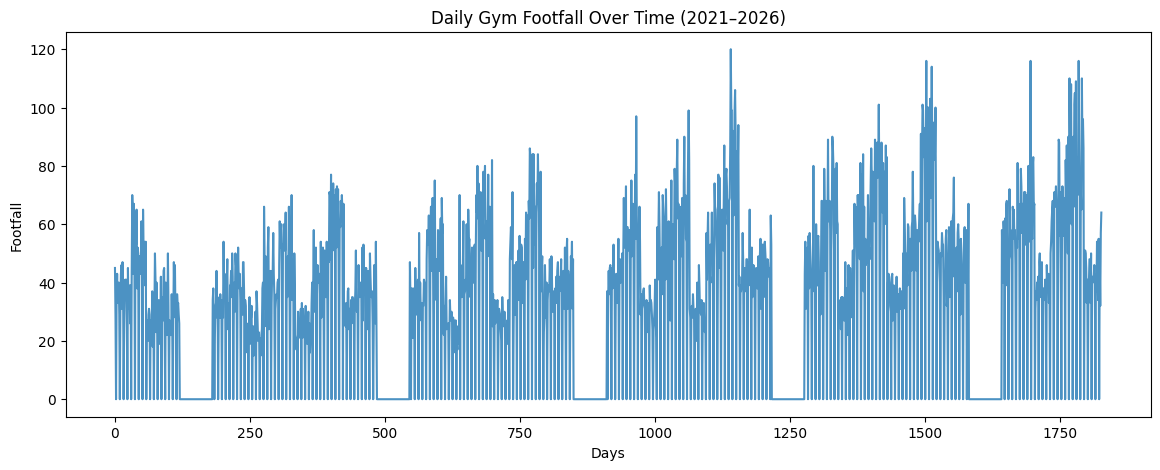

In [15]:
plt.figure(figsize=(14, 5))
plt.plot(df["daily_gym_footfall"], alpha=0.8)
plt.title("Daily Gym Footfall Over Time (2021–2026)")
plt.xlabel("Days")
plt.ylabel("Footfall")
plt.show()


Monthly Average Footfall

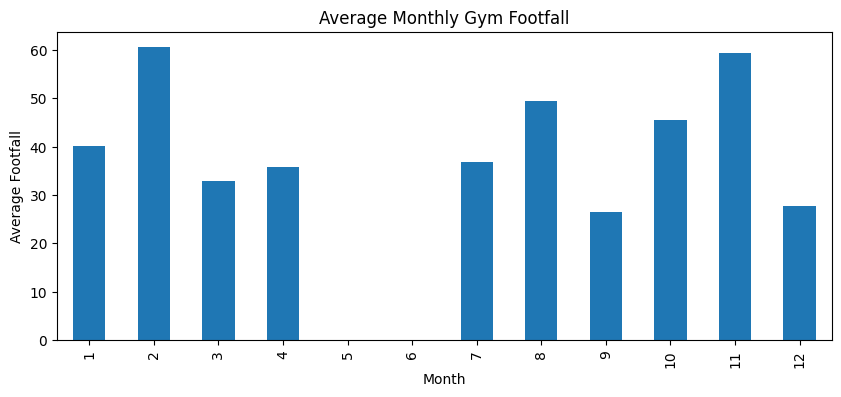

In [16]:
df["month"] = pd.to_datetime(df.index, unit="D", origin="2021-01-01").month

monthly_avg = df.groupby("month")["daily_gym_footfall"].mean()

plt.figure(figsize=(10, 4))
monthly_avg.plot(kind="bar")
plt.title("Average Monthly Gym Footfall")
plt.xlabel("Month")
plt.ylabel("Average Footfall")
plt.show()


Impact of Exam Phases

In [17]:
# Impact of Exam Phases

exam_effect = {
    "No Exam": df[df["exam_phase_midterm"] == 0]["daily_gym_footfall"].mean(),
    "Midterm": df[df["exam_phase_midterm"] == 1]["daily_gym_footfall"].mean()}

exam_effect


{'No Exam': np.float64(31.81090008257638),
 'Midterm': np.float64(39.64935064935065)}

Weather Impact Analysis

In [18]:
weather_cols = [c for c in df.columns if c.startswith("weather_condition_")]

weather_impact = {}
for col in weather_cols:
    weather_impact[col.replace("weather_condition_", "")] = \
        df[df[col] == 1]["daily_gym_footfall"].mean()

pd.Series(weather_impact)


extreme_heat    17.636066
heavy_rain      37.693478
normal          39.491345
dtype: float64

Maintenance Severity vs Footfall

In [19]:
maint_cols = [c for c in df.columns if c.startswith("maintenance_severity_")]

maintenance_impact = {}
for col in maint_cols:
    maintenance_impact[col.replace("maintenance_severity_", "")] = \
        df[df[col] == 1]["daily_gym_footfall"].mean()

pd.Series(maintenance_impact)


low       31.514286
medium    39.759259
none      34.441597
dtype: float64

Capacity Utilization Analysis

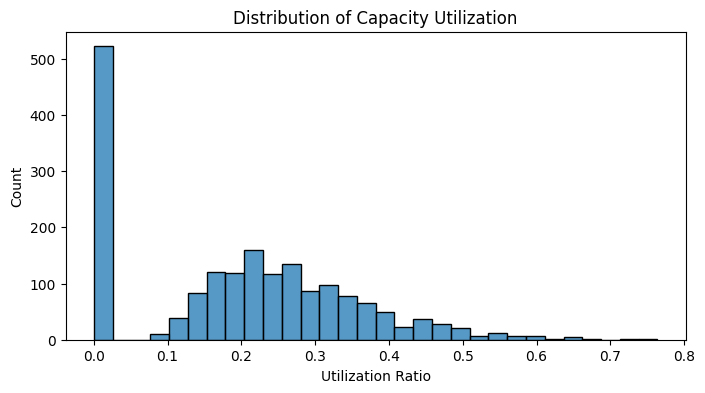

In [20]:
df["capacity_utilization"] = (df["daily_gym_footfall"] / df["effective_capacity"])

df["capacity_utilization"].describe()

plt.figure(figsize=(8, 4))
sns.histplot(df["capacity_utilization"], bins=30)
plt.title("Distribution of Capacity Utilization")
plt.xlabel("Utilization Ratio")
plt.show()

Correlation Overview (Numerical Features)

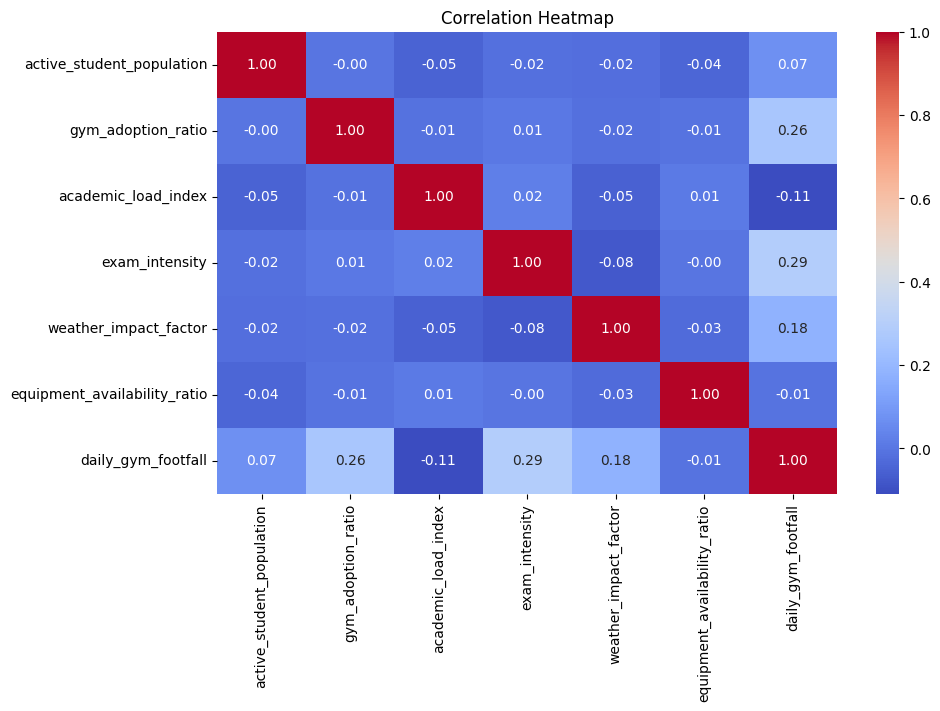

In [21]:
numerical_cols = [
    "active_student_population",
    "gym_adoption_ratio",
    "academic_load_index",
    "exam_intensity",
    "weather_impact_factor",
    "equipment_availability_ratio",
    "daily_gym_footfall"
]

corr = df[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Exploratory Data Analysis: Key Inferences

### 1. Temporal Footfall Trends
Daily gym footfall shows strong seasonal patterns, regular weekly dips, and extended zero-usage periods during annual vacations. A gradual increase over time indicates growing gym adoption among students.

### 2. Monthly Seasonality
Higher average footfall is observed in January and at the start of the academic year, while reduced usage appears during extreme weather months. Near-zero values in May and June confirm gym closure during vacations.

### 3. Impact of Academic Examinations
Gym attendance declines during examination periods, with end-term exams causing a larger reduction than mid-term exams, highlighting the effect of academic pressure on student behavior.

### 4. Capacity Utilization
Most days operate at low to moderate capacity utilization, with only a small number of days approaching saturation. This indicates generally sufficient capacity with occasional peak demand.


### 5. Weather Influence
Normal weather conditions are associated with higher gym usage, while extreme rainfall, heat, and cold mornings lead to reduced footfall, demonstrating the role of environmental factors.


### 6. Correlation Insights
Gym footfall is moderately influenced by multiple factors such as gym adoption, exam intensity, and academic load. No single variable dominates, suggesting the presence of non-linear relationships.


### 7. Overall Summary
The EDA confirms that gym footfall is shaped by a combination of academic, seasonal, behavioral, and operational factors, justifying the use of ensemble-based machine learning models for prediction.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [23]:
df_ts = df.copy()
df_ts["date"] = pd.to_datetime(df_ts["date"])
df_ts.set_index("date", inplace=True)

ts = df_ts["daily_gym_footfall"]

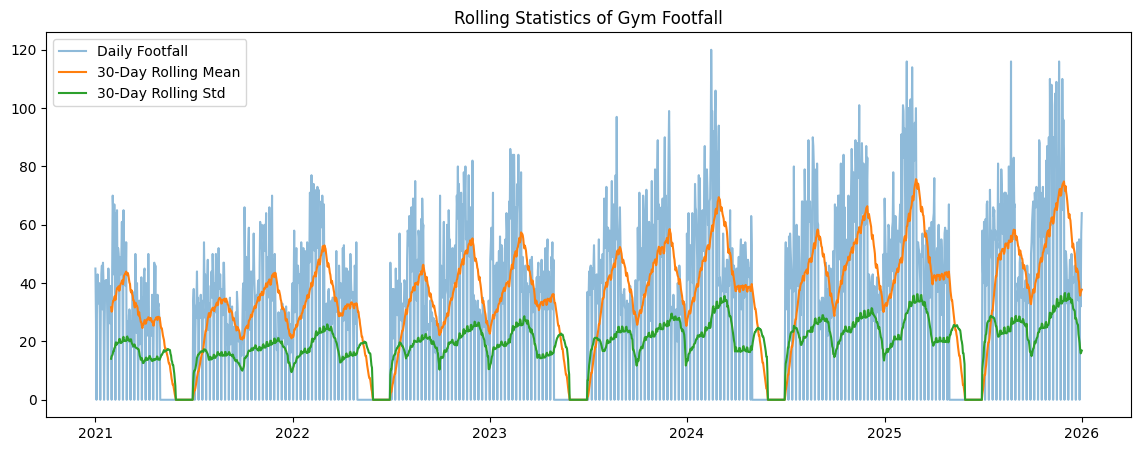

In [24]:
rolling_mean = ts.rolling(window=30).mean()
rolling_std = ts.rolling(window=30).std()

plt.figure(figsize=(14, 5))
plt.plot(ts, alpha=0.5, label="Daily Footfall")
plt.plot(rolling_mean, label="30-Day Rolling Mean")
plt.plot(rolling_std, label="30-Day Rolling Std")
plt.legend()
plt.title("Rolling Statistics of Gym Footfall")
plt.show()

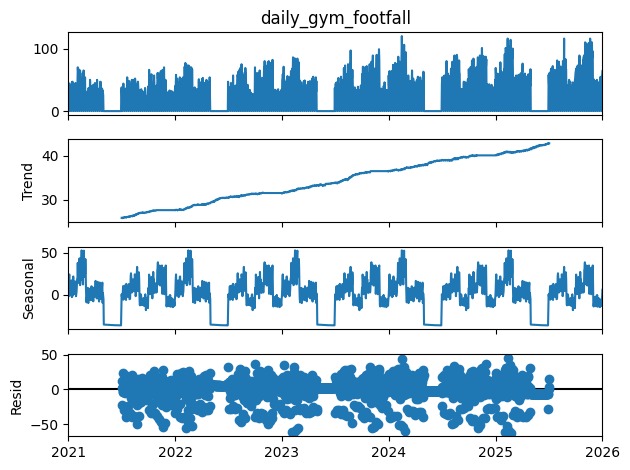

In [25]:
decomposition = seasonal_decompose(ts, model="additive", period=365)

decomposition.plot()
plt.show()

<Figure size 1200x400 with 0 Axes>

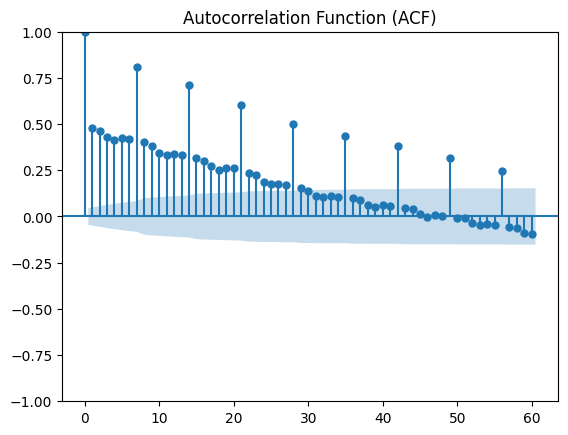

In [26]:
plt.figure(figsize=(12, 4))
plot_acf(ts, lags=60)
plt.title("Autocorrelation Function (ACF)")
plt.show()

## Seasonality, Trend, and Autocorrelation: Observations

### Rolling Statistics
The rolling mean shows a clear upward trend in gym footfall over time, indicating increasing student participation. The rolling standard deviation varies across periods, suggesting changing variability driven by seasonal effects, exams, and operational closures.


### Seasonal Decomposition
The decomposition reveals a steadily increasing long-term trend and a strong recurring seasonal component, confirming annual seasonality in gym usage. The residual component appears randomly distributed around zero, indicating that most systematic patterns are captured by trend and seasonality.


### Autocorrelation (ACF)
The ACF plot shows significant positive autocorrelation at lower lags with a slow decay, indicating strong temporal dependence and non-stationarity. Periodic spikes suggest recurring seasonal patterns in footfall.

### Overall Insight
The presence of trend, seasonality, and autocorrelation confirms that gym footfall is time-dependent and non-stationary, supporting the need for models capable of handling non-linear and temporal patterns rather than simple linear assumptions.